In [43]:
%pip install yfinance matplotlib pandas plotly



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [45]:
ativos = ['PFAVAL.CL', 'OCCIDENTE.CL', 'BBVACOL.CL', 'PFDAVVNDA.CL', 'BOGOTA.CL'] 
df = yf.download(ativos, start="2016-01-01", end="2025-01-01")['Close']

/var/folders/hq/l8_6hq6j0nn5wyr712wt0kkh0000gn/T/ipykernel_7048/2922445250.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ativos, start="2016-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  5 of 5 completed


In [46]:
print(df.columns)

Index(['BBVACOL.CL', 'BOGOTA.CL', 'OCCIDENTE.CL', 'PFAVAL.CL', 'PFDAVVNDA.CL'], dtype='object', name='Ticker')


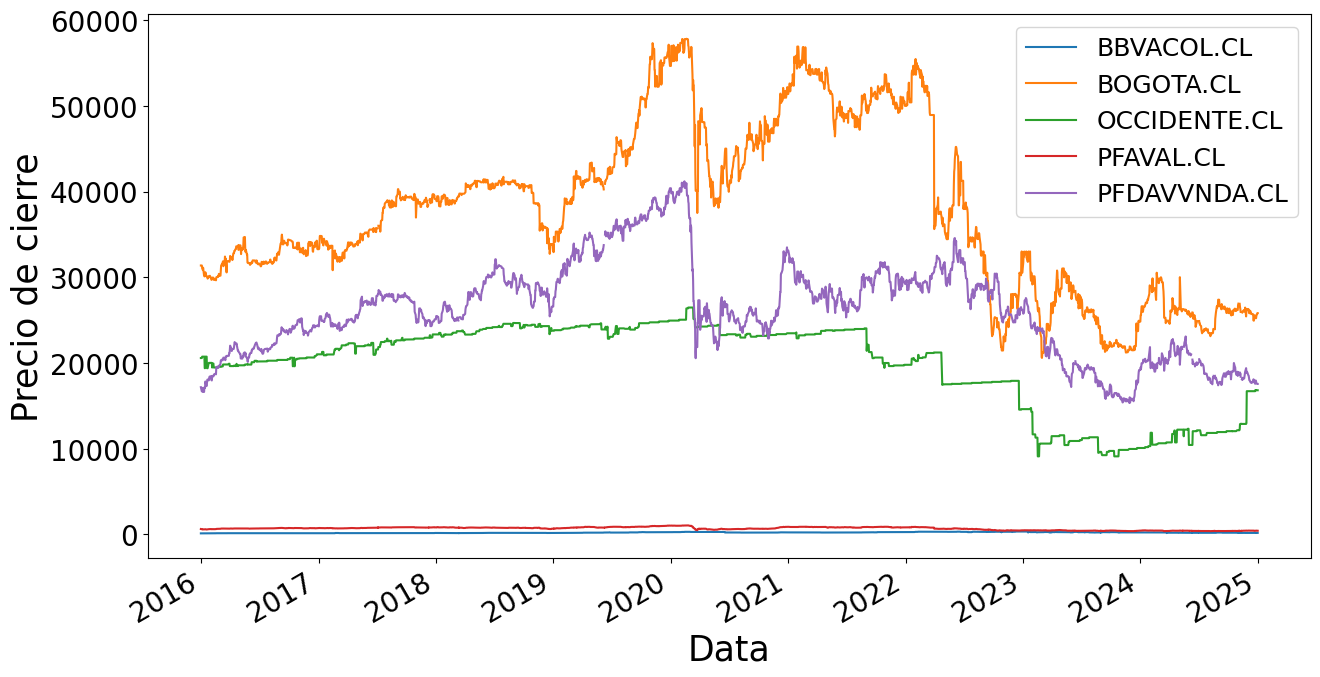

In [47]:
df_close = df   

df_close.plot(figsize=[15,8])
plt.xlabel('Data',  fontsize=25)
plt.ylabel('Precio de cierre', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize=18)
plt.show()


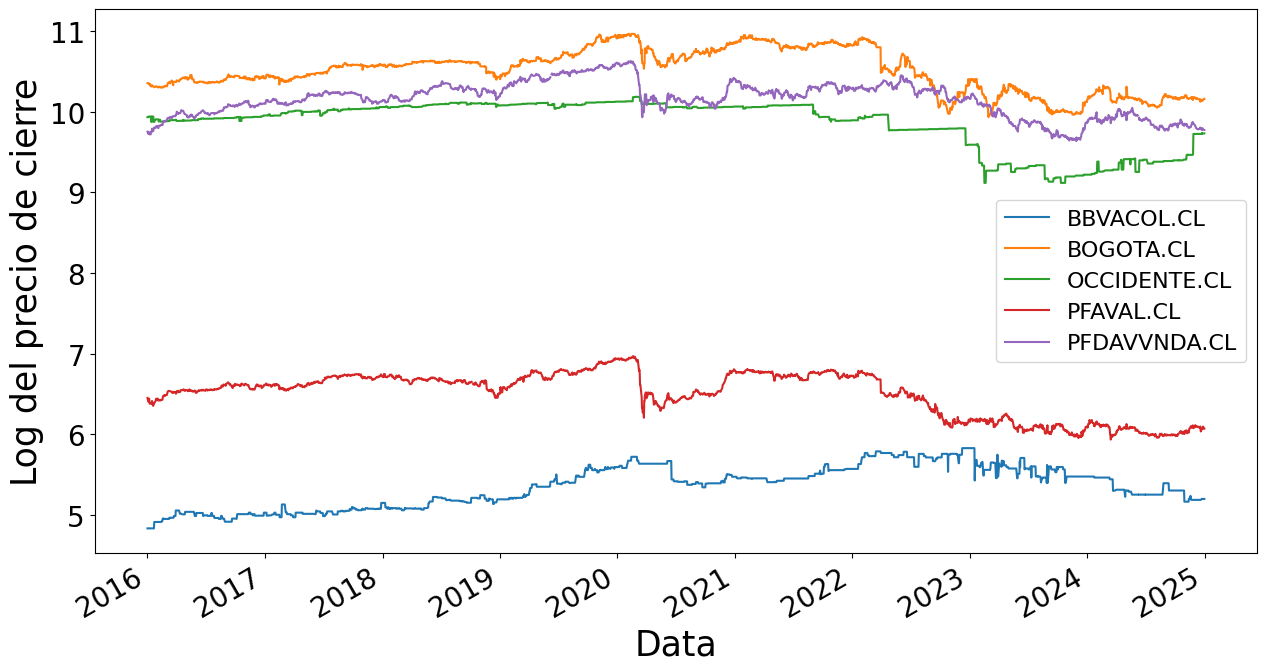

In [48]:
np.log(df_close + 1).plot(figsize=[15,8]) 
plt.xlabel('Data',  fontsize=25)
plt.ylabel('Log del precio de cierre',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = 'best', fontsize=16);
plt.show()

In [49]:
retorno = df.pct_change()
retorno

/var/folders/hq/l8_6hq6j0nn5wyr712wt0kkh0000gn/T/ipykernel_7048/1862976931.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retorno = df.pct_change()


Ticker,BBVACOL.CL,BOGOTA.CL,OCCIDENTE.CL,PFAVAL.CL,PFDAVVNDA.CL
Date,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.0,0.000000,0.000000,-0.045871,-0.028440
2016-01-05,0.0,-0.008403,0.007854,0.000000,0.000000
2016-01-06,0.0,0.000000,0.000000,0.038462,0.024551
2016-01-07,0.0,-0.008476,0.000000,-0.046297,-0.012903
...,...,...,...,...,...
2024-12-25,0.0,0.000000,0.000000,0.000000,0.000000
2024-12-26,0.0,0.000000,0.000000,0.008989,-0.006682
2024-12-27,0.0,0.011433,0.000000,0.020044,-0.012332


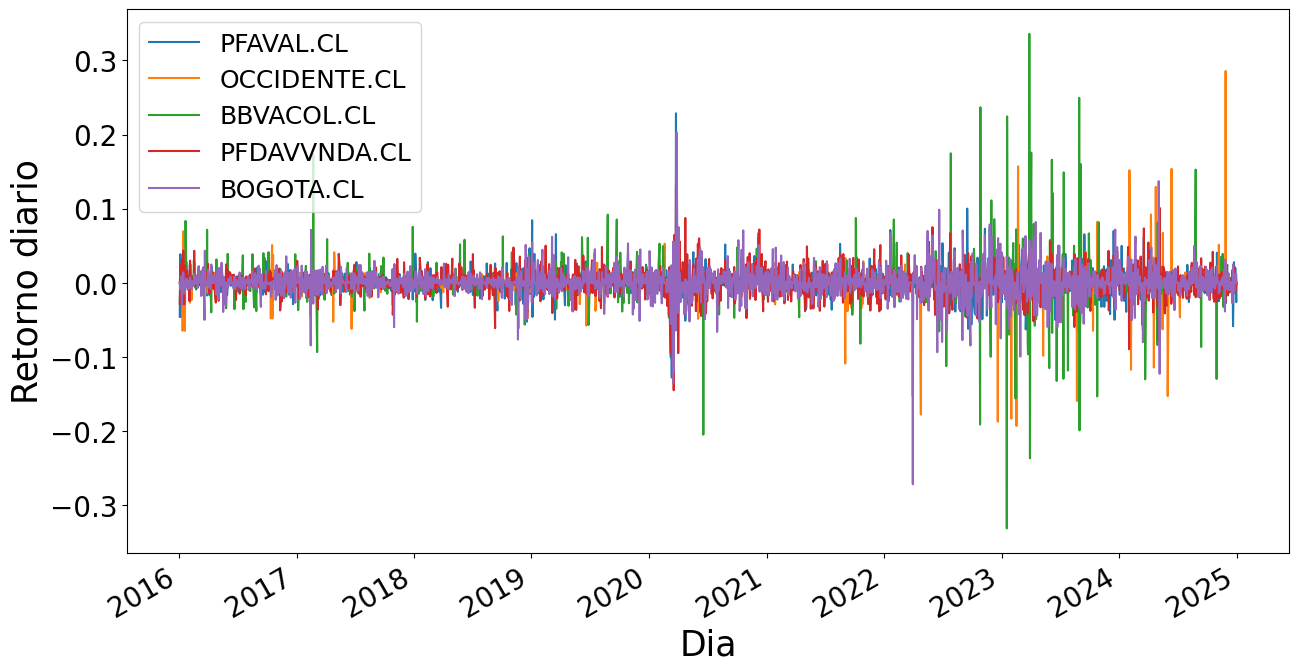

In [50]:
n = 5
retorno[ativos[0:n]].plot(figsize=[15,8]) 
plt.xlabel('Dia',  fontsize=25)
plt.ylabel('Retorno diario',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = 'best', fontsize=18);
plt.show()

In [51]:
log_retorno = np.log(df/df.shift())
log_retorno

Ticker,BBVACOL.CL,BOGOTA.CL,OCCIDENTE.CL,PFAVAL.CL,PFDAVVNDA.CL
Date,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.0,0.000000,0.000000,-0.046957,-0.028853
2016-01-05,0.0,-0.008439,0.007823,0.000000,0.000000
2016-01-06,0.0,0.000000,0.000000,0.037740,0.024255
2016-01-07,0.0,-0.008512,0.000000,-0.047402,-0.012987
...,...,...,...,...,...
2024-12-25,NaN,0.000000,NaN,0.000000,0.000000
2024-12-26,NaN,0.000000,NaN,0.008949,-0.006704
2024-12-27,0.0,0.011368,0.000000,0.019846,-0.012409


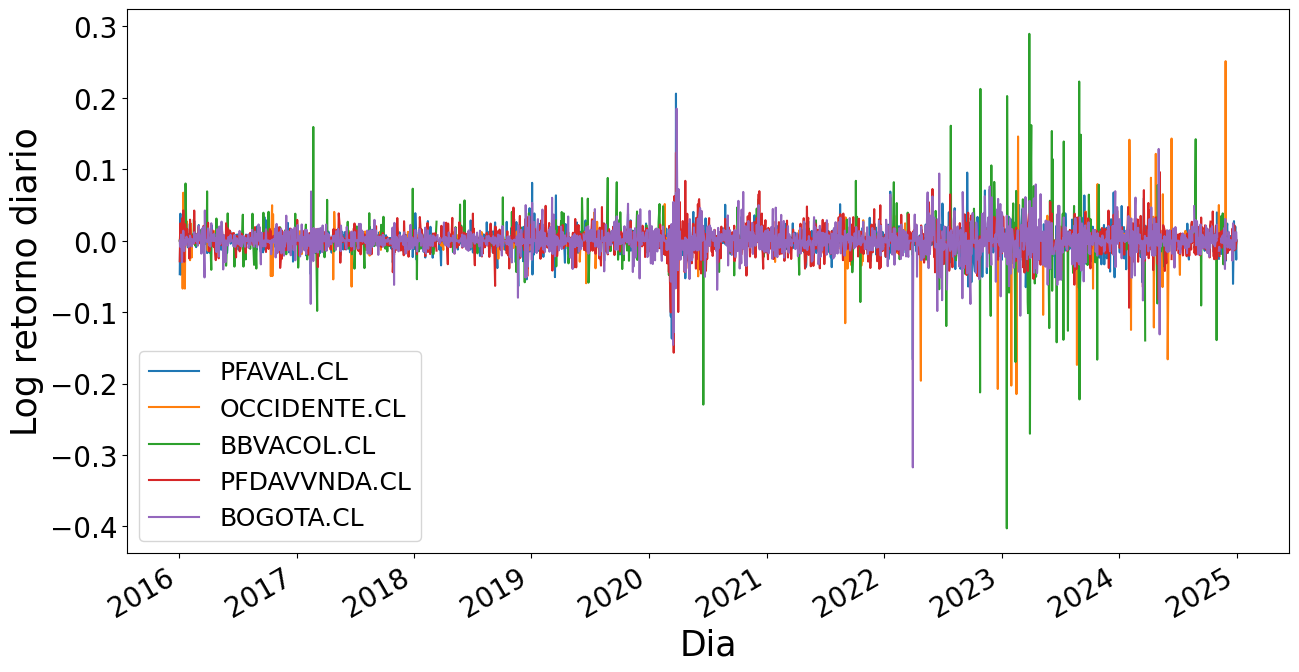

In [52]:
n = 5
log_retorno[ativos[0:n]].plot(figsize=[15,8]) 
plt.xlabel('Dia',  fontsize=25)
plt.ylabel('Log retorno diario',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = 'best', fontsize=18);
plt.show()

In [53]:
varianca = retorno.var()
varianca

Ticker
BBVACOL.CL      0.000558
BOGOTA.CL       0.000358
OCCIDENTE.CL    0.000226
PFAVAL.CL       0.000278
PFDAVVNDA.CL    0.000273
dtype: float64

In [54]:
# Volatilidad anual
volatld = np.sqrt(varianca * 250)
volatld

Ticker
BBVACOL.CL      0.373659
BOGOTA.CL       0.299042
OCCIDENTE.CL    0.237775
PFAVAL.CL       0.263583
PFDAVVNDA.CL    0.261470
dtype: float64

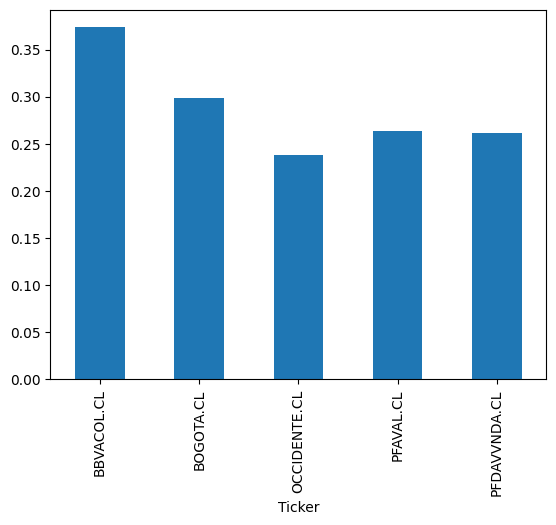

In [55]:
volatld.plot(kind='bar');

In [56]:
cov_matrix = df.pct_change().cov()
cov_matrix = cov_matrix.dropna()
cov_matrix

/var/folders/hq/l8_6hq6j0nn5wyr712wt0kkh0000gn/T/ipykernel_7048/3689008477.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cov_matrix = df.pct_change().cov()


Ticker,BBVACOL.CL,BOGOTA.CL,OCCIDENTE.CL,PFAVAL.CL,PFDAVVNDA.CL
Ticker,,,,,
BBVACOL.CL,5.584847e-04,4.493878e-07,-0.000001,0.000010,0.000023
BOGOTA.CL,4.493878e-07,3.577044e-04,0.000002,0.000107,0.000064
OCCIDENTE.CL,-1.042715e-06,2.218704e-06,0.000226,0.000010,0.000002
PFAVAL.CL,9.843839e-06,1.073661e-04,0.000010,0.000278,0.000089
PFDAVVNDA.CL,2.336794e-05,6.415186e-05,0.000002,0.000089,0.000273


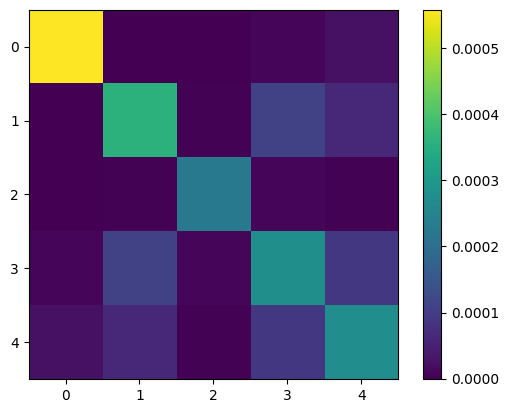

In [57]:
plt.imshow(cov_matrix, interpolation='nearest')
plt.colorbar()
plt.show()

In [58]:
corr_matrix = df.pct_change().corr()
corr_matrix = corr_matrix.dropna()
corr_matrix

/var/folders/hq/l8_6hq6j0nn5wyr712wt0kkh0000gn/T/ipykernel_7048/3572285557.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  corr_matrix = df.pct_change().corr()


Ticker,BBVACOL.CL,BOGOTA.CL,OCCIDENTE.CL,PFAVAL.CL,PFDAVVNDA.CL
Ticker,,,,,
BBVACOL.CL,1.000000,0.001005,-0.002934,0.024987,0.059795
BOGOTA.CL,0.001005,1.000000,0.007801,0.340532,0.205114
OCCIDENTE.CL,-0.002934,0.007801,1.000000,0.039321,0.007905
PFAVAL.CL,0.024987,0.340532,0.039321,1.000000,0.322023
PFDAVVNDA.CL,0.059795,0.205114,0.007905,0.322023,1.000000


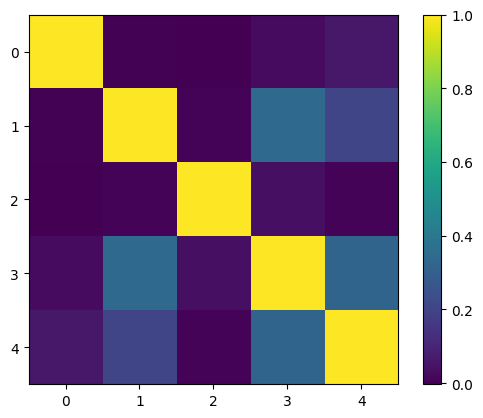

In [59]:
plt.imshow(corr_matrix, interpolation='nearest')
plt.colorbar()
plt.show()

In [60]:
# Generación de pesos aleatorios para cada ativo
n_atv = len(ativos)             
pesos = np.random.random(n_atv) 
pesos = pesos/np.sum(pesos)     
print('ativos: ',ativos)        
print('pesos : ',pesos)         

ativos:  ['PFAVAL.CL', 'OCCIDENTE.CL', 'BBVACOL.CL', 'PFDAVVNDA.CL', 'BOGOTA.CL']
pesos :  [0.18874696 0.54282167 0.07045815 0.04732837 0.15064485]


In [61]:
# Retorno anual medio
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

/var/folders/hq/l8_6hq6j0nn5wyr712wt0kkh0000gn/T/ipykernel_7048/3791952350.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


Ticker
BBVACOL.CL      0.051466
BOGOTA.CL       0.004144
OCCIDENTE.CL    0.007377
PFAVAL.CL      -0.034193
PFDAVVNDA.CL   -0.018290
dtype: float64

In [62]:
# Volatilidad anual
ann_sd = df.pct_change().std().apply(lambda x: x*np.sqrt(250))
ann_sd
vol    = df.pct_change().std().apply(lambda x: x*np.sqrt(250))
vol

/var/folders/hq/l8_6hq6j0nn5wyr712wt0kkh0000gn/T/ipykernel_7048/2326825799.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ann_sd = df.pct_change().std().apply(lambda x: x*np.sqrt(250))
/var/folders/hq/l8_6hq6j0nn5wyr712wt0kkh0000gn/T/ipykernel_7048/2326825799.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  vol    = df.pct_change().std().apply(lambda x: x*np.sqrt(250))


Ticker
BBVACOL.CL      0.373659
BOGOTA.CL       0.299042
OCCIDENTE.CL    0.237775
PFAVAL.CL       0.263583
PFDAVVNDA.CL    0.261470
dtype: float64

In [63]:
assets = pd.concat([ind_er, ann_sd], axis=1) 
assets.columns = ['Returno', 'Risco']
assets

,Returno,Risco
Ticker,,
BBVACOL.CL,0.051466,0.373659
BOGOTA.CL,0.004144,0.299042
OCCIDENTE.CL,0.007377,0.237775
PFAVAL.CL,-0.034193,0.263583
PFDAVVNDA.CL,-0.018290,0.261470


In [64]:
p_ret    = [] # Define una "empty list" para los retornos de los portfolios
p_vol    = [] # Define una "empty list" para la volatilidade 
p_pesos  = [] # Define una "empty list" para los pesos de los activos

num_portfolios = 30000

In [65]:
for port in range(num_portfolios):
    pesos = np.random.random(n_atv)      
    pesos = pesos/np.sum(pesos)
    p_pesos.append(pesos)
    retornos = np.dot(pesos, ind_er)      
    p_ret.append(retornos)
    var     = cov_matrix.mul(pesos, axis=0).mul(pesos, axis=1).sum().sum() 
    sd      = np.sqrt(var)                
    ann_sd  = sd*np.sqrt(250)            
    p_vol.append(ann_sd)

In [66]:
data = {'Retorno':p_ret, 'Riesgo':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data['peso '+ symbol] = [w[counter] for w in p_pesos]

In [67]:
portfolios  = pd.DataFrame(data)
portfolios.head(n = 10) # Visualizar los n primeros portfolios de los 30000 portfolios creados con pesos aleatorios

,Retorno,Riesgo,peso BBVACOL.CL,peso BOGOTA.CL,peso OCCIDENTE.CL,peso PFAVAL.CL,peso PFDAVVNDA.CL
0,0.003979,0.148857,0.171993,0.224222,0.259816,0.089780,0.254190
1,0.018732,0.177282,0.352009,0.314987,0.218541,0.013097,0.101366
2,-0.012088,0.159368,0.010474,0.131389,0.322702,0.362148,0.173286
3,-0.009207,0.179351,0.040559,0.343955,0.082460,0.225059,0.307968
4,-0.021820,0.191184,0.008911,0.034406,0.088328,0.452162,0.416193
5,0.016846,0.199167,0.412988,0.328528,0.051166,0.148100,0.059219
6,0.005791,0.185608,0.171260,0.480443,0.076774,0.038611,0.232912
7,-0.016068,0.202883,0.010292,0.360857,0.010066,0.430725,0.188060
8,0.006374,0.157390,0.243757,0.159956,0.326054,0.270217,0.000016
9,0.000106,0.162376,0.101384,0.049939,0.562249,0.265840,0.020588


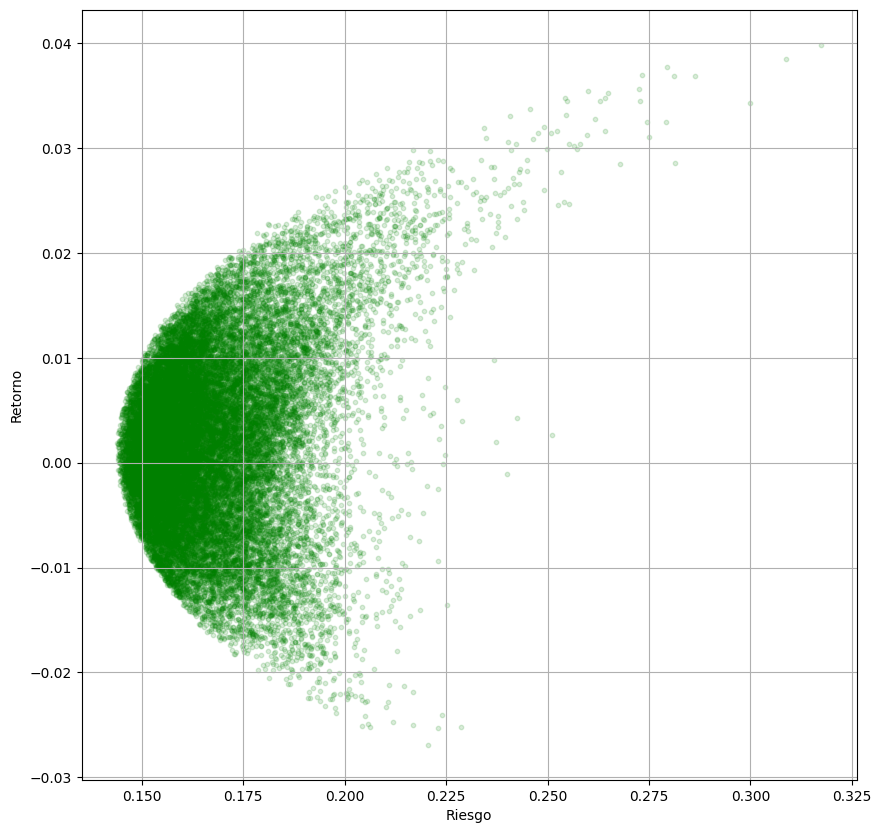

In [68]:
portfolios.plot.scatter(x='Riesgo', y='Retorno', c='green', marker='o', s=10, alpha=0.15, grid=True, figsize=[10,10]);

In [69]:
min_vol_port = portfolios.iloc[portfolios['Riesgo'].idxmin()]
# idxmin() retorna el valor mínimo de la columna especificada
min_vol_port

Retorno              0.001847
Riesgo               0.143850
peso BBVACOL.CL      0.146109
peso BOGOTA.CL       0.146353
peso OCCIDENTE.CL    0.358326
peso PFAVAL.CL       0.159442
peso PFDAVVNDA.CL    0.189771
Name: 7840, dtype: float64

In [70]:
max_ret_port = portfolios.iloc[portfolios['Retorno'].idxmax()]
# idxmax() retorna el valor máximo de la columna especificada
max_ret_port

Retorno              0.039842
Riesgo               0.317515
peso BBVACOL.CL      0.843239
peso BOGOTA.CL       0.004084
peso OCCIDENTE.CL    0.030663
peso PFAVAL.CL       0.098555
peso PFDAVVNDA.CL    0.023459
Name: 4391, dtype: float64

In [71]:
# Portfolio óptimo (mejor Sharpe Ratio)
# Tasa libre de riesgo (risk factor). TES media de los últimos años ~ 5%
rf0 = 0.05 
opt_ris_por0 = portfolios.iloc[((portfolios['Retorno']-rf0)/portfolios['Riesgo']).idxmax()]
opt_ris_por0

Retorno              0.039842
Riesgo               0.317515
peso BBVACOL.CL      0.843239
peso BOGOTA.CL       0.004084
peso OCCIDENTE.CL    0.030663
peso PFAVAL.CL       0.098555
peso PFDAVVNDA.CL    0.023459
Name: 4391, dtype: float64

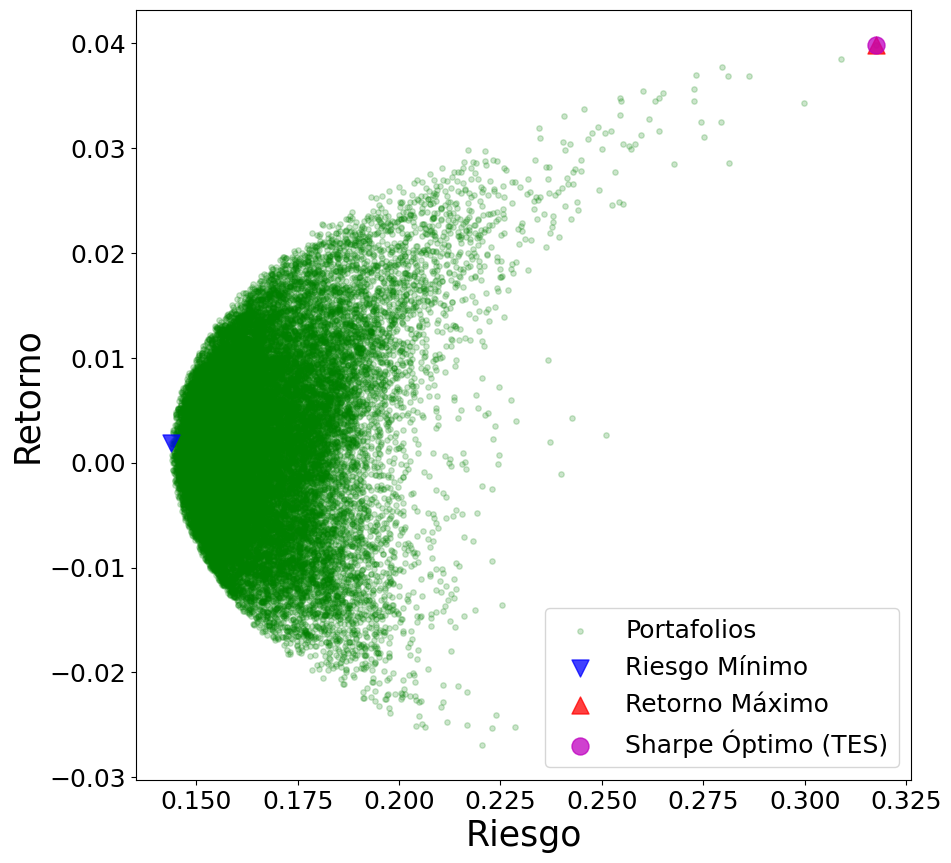

In [72]:
plt.subplots(figsize=[10,10])

xx = portfolios['Riesgo']
yy = portfolios['Retorno']

plt.scatter(xx, yy, c='g', marker='o', s=15, alpha=0.2, label='Portafolios')

# Riesgo mínimo
plt.scatter(min_vol_port['Riesgo'], min_vol_port['Retorno'],
            c='b', marker='v', s=150, alpha=0.75, label='Riesgo Mínimo')

# Retorno máximo
plt.scatter(max_ret_port['Riesgo'], max_ret_port['Retorno'],
            c='r', marker='^', s=150, alpha=0.75, label='Retorno Máximo')

# Sharpe óptimo (TES)
plt.scatter(opt_ris_por0['Riesgo'], opt_ris_por0['Retorno'],
            c='m', marker='o', s=150, alpha=0.75, label='Sharpe Óptimo (TES)')

plt.xlabel('Riesgo', fontsize=25)
plt.ylabel('Retorno', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()


# Problema de calidad de datos en los activos colombianos y corrección para la frontera eficiente

Al aplicar el método clásico de Markowitz a las acciones de los bancos colombianos 
(Grupo Aval, Banco de Bogotá, Davivienda, BBVA Colombia y Banco de Occidente), 
la frontera eficiente resultante presentó una distorsión evidente: varios portafolios extremos
(quienes maximizaban el retorno y el Sharpe ratio) aparecían completamente aislados
en la esquina superior derecha de la gráfica.

A diferencia del caso brasileño presentado en el artículo de referencia, en el cual la nube
de portafolios es suave y continua, los datos colombianos produjeron valores anuales
de retorno esperados exageradamente grandes y riesgos asociados atípicos.
Esta discrepancia **no se debe a un problema del método**, sino a la naturaleza 
de los datos utilizados.


### 1. Causa principal: baja liquidez y saltos abruptos en los precios

Los activos colombianos seleccionados tienen **baja liquidez diaria**.
Es frecuente encontrar:

- **Días sin transacción**, en los cuales el precio permanece congelado.
- **Saltos abruptos cuando sí hay transacción**, por ejemplo variaciones de 10–30% de un día a otro.
- **Actualizaciones tardías en Yahoo Finance**, especialmente para acciones preferenciales.
- **Series históricas con huecos o precios corregidos retroactivamente**.



In [73]:
retorno = df_close.pct_change().dropna()

/var/folders/hq/l8_6hq6j0nn5wyr712wt0kkh0000gn/T/ipykernel_7048/2493044414.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retorno = df_close.pct_change().dropna()


In [74]:
outliers_mask = (retorno.abs() > 0.10)
outliers_mask.sum()
outliers_mask.sum(axis=0)

Ticker
BBVACOL.CL      27
BOGOTA.CL        6
OCCIDENTE.CL    14
PFAVAL.CL        5
PFDAVVNDA.CL     4
dtype: int64

In [75]:
outliers = retorno[outliers_mask.any(axis=1)]
outliers

Ticker,BBVACOL.CL,BOGOTA.CL,OCCIDENTE.CL,PFAVAL.CL,PFDAVVNDA.CL
Date,,,,,
2017-02-22,0.172549,-0.028150,0.000000,0.000000,-0.002658
2020-03-09,-0.037037,-0.055745,0.000000,-0.100719,-0.095607
2020-03-12,0.000000,-0.012195,-0.050000,-0.128099,-0.080712
2020-03-16,0.000000,-0.135803,0.000000,-0.099526,-0.079406
2020-03-18,0.000000,-0.120433,0.000000,-0.125689,-0.145173
2020-03-25,0.000000,0.068621,0.000000,0.228572,0.131147
2020-03-27,0.000000,0.203037,0.000000,0.069767,0.105073
2020-06-18,-0.205128,0.014038,0.000000,-0.006857,-0.026974
2021-09-02,0.000000,-0.006293,-0.109145,0.017857,-0.001534


In [76]:
retorno_clean = retorno.clip(lower=-0.10, upper=0.10)
(retorno_clean.abs() > 0.10).sum()

Ticker
BBVACOL.CL      0
BOGOTA.CL       0
OCCIDENTE.CL    0
PFAVAL.CL       0
PFDAVVNDA.CL    0
dtype: int64

In [77]:
mu_diario_clean = retorno_clean.mean()
mu_diario_clean
mu_anual_clean = mu_diario_clean * 252
mu_anual_clean

Ticker
BBVACOL.CL      0.090506
BOGOTA.CL       0.036905
OCCIDENTE.CL    0.020046
PFAVAL.CL      -0.008305
PFDAVVNDA.CL    0.037683
dtype: float64

In [78]:
cov_diaria_clean = retorno_clean.cov()
cov_diaria_clean
cov_anual_clean = cov_diaria_clean * 252
cov_anual_clean

Ticker,BBVACOL.CL,BOGOTA.CL,OCCIDENTE.CL,PFAVAL.CL,PFDAVVNDA.CL
Ticker,,,,,
BBVACOL.CL,0.068828,0.000840,0.000073,0.002257,0.004093
BOGOTA.CL,0.000840,0.077016,0.000322,0.020579,0.014315
OCCIDENTE.CL,0.000073,0.000322,0.029531,0.002455,0.000339
PFAVAL.CL,0.002257,0.020579,0.002455,0.062705,0.019095
PFDAVVNDA.CL,0.004093,0.014315,0.000339,0.019095,0.066815


In [79]:
vol_anual_clean = np.sqrt(np.diag(cov_anual_clean))
pd.Series(vol_anual_clean, index=retorno_clean.columns)

Ticker
BBVACOL.CL      0.262351
BOGOTA.CL       0.277518
OCCIDENTE.CL    0.171845
PFAVAL.CL       0.250409
PFDAVVNDA.CL    0.258486
dtype: float64

In [80]:
p_ret    = []   # retornos anuales del portafolio
p_vol    = []   # volatilidades anuales del portafolio
p_pesos  = []   # pesos de los activos

num_portfolios = 30000
n_assets = len(mu_anual_clean)

for port in range(num_portfolios):

    # 1. Pesos aleatorios
    pesos = np.random.random(n_assets)
    pesos = pesos / np.sum(pesos)
    p_pesos.append(pesos)

    # 2. Retorno anual esperado del portafolio
    retornos = np.dot(pesos, mu_anual_clean)
    p_ret.append(retornos)

    # 3. Varianza y volatilidad anual del portafolio
    var = np.dot(pesos.T, np.dot(cov_anual_clean, pesos))
    sd  = np.sqrt(var)  # volatilidad anual
    p_vol.append(sd)


data = {'Retorno': p_ret, 'Riesgo': p_vol}

for counter, symbol in enumerate(retorno_clean.columns.tolist()):
    data['peso ' + symbol] = [w[counter] for w in p_pesos]

portfolios_clean = pd.DataFrame(data)

portfolios_clean.head(10)

,Retorno,Riesgo,peso BBVACOL.CL,peso BOGOTA.CL,peso OCCIDENTE.CL,peso PFAVAL.CL,peso PFDAVVNDA.CL
0,0.025423,0.131626,0.069861,0.190803,0.305502,0.226454,0.207379
1,0.029694,0.151136,0.110181,0.220295,0.113821,0.252901,0.302801
2,0.038206,0.133054,0.320252,0.055908,0.225634,0.268997,0.129210
3,0.039743,0.136498,0.137278,0.258339,0.282343,0.000241,0.321799
4,0.043040,0.130411,0.279537,0.221221,0.211283,0.119818,0.168141
5,0.038755,0.136495,0.193999,0.130376,0.208131,0.117487,0.350008
6,0.035671,0.147790,0.259108,0.106079,0.078378,0.309506,0.246929
7,0.033945,0.146016,0.134136,0.274045,0.138688,0.177519,0.275612
8,0.041729,0.137964,0.267011,0.125109,0.151805,0.158391,0.297685
9,0.032662,0.137692,0.194876,0.063899,0.191600,0.258450,0.291175


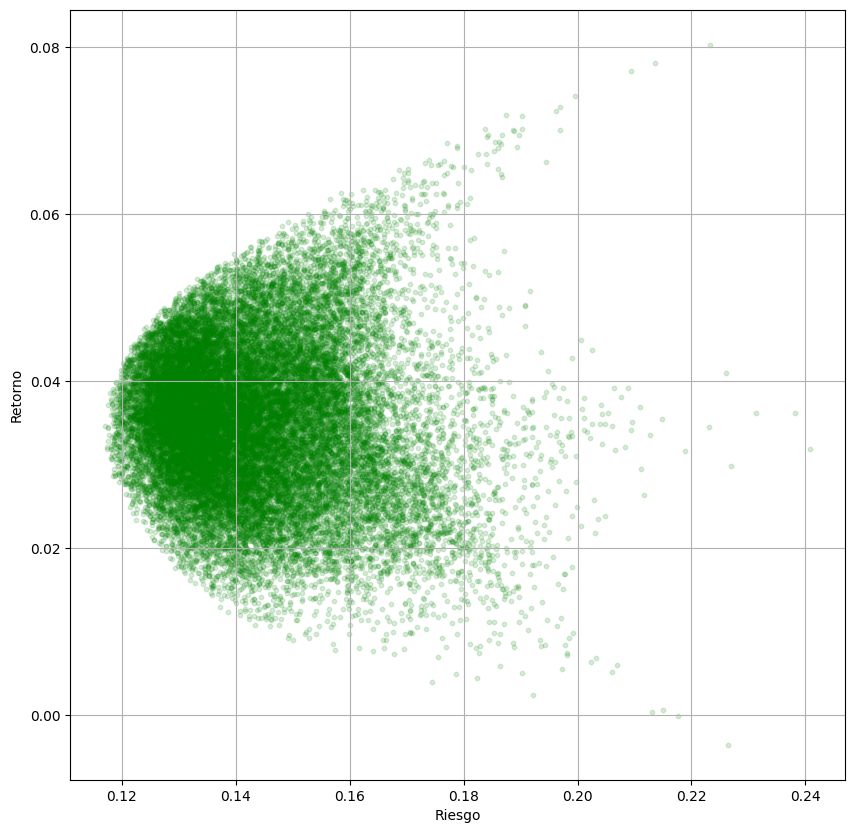

In [81]:
portfolios_clean.plot.scatter(x='Riesgo', y='Retorno', c='green', marker='o', s=10, alpha=0.15, grid=True, figsize=[10,10]);

In [82]:
min_vol_clean= portfolios_clean.iloc[portfolios['Riesgo'].idxmin()]
# idxmin() retorna el valor mínimo de la columna especificada                         
min_vol_port

Retorno              0.001847
Riesgo               0.143850
peso BBVACOL.CL      0.146109
peso BOGOTA.CL       0.146353
peso OCCIDENTE.CL    0.358326
peso PFAVAL.CL       0.159442
peso PFDAVVNDA.CL    0.189771
Name: 7840, dtype: float64

In [83]:
max_ret_clean = portfolios_clean.iloc[portfolios['Retorno'].idxmax()]
# idxmax() retorna el valor máximo de la columna especificada
max_ret_port

Retorno              0.039842
Riesgo               0.317515
peso BBVACOL.CL      0.843239
peso BOGOTA.CL       0.004084
peso OCCIDENTE.CL    0.030663
peso PFAVAL.CL       0.098555
peso PFDAVVNDA.CL    0.023459
Name: 4391, dtype: float64

In [84]:
# Portfolio óptimo (mejor Sharpe Ratio)
# Tasa libre de riesgo (risk factor). TES media de los últimos años ~ 5%
rf0 = 0.05 
opt_ris_clean = portfolios_clean.iloc[((portfolios['Retorno']-rf0)/portfolios['Riesgo']).idxmax()]
opt_ris_clean

Retorno              0.041425
Riesgo               0.148930
peso BBVACOL.CL      0.263240
peso BOGOTA.CL       0.155075
peso OCCIDENTE.CL    0.065668
peso PFAVAL.CL       0.193186
peso PFDAVVNDA.CL    0.322831
Name: 4391, dtype: float64

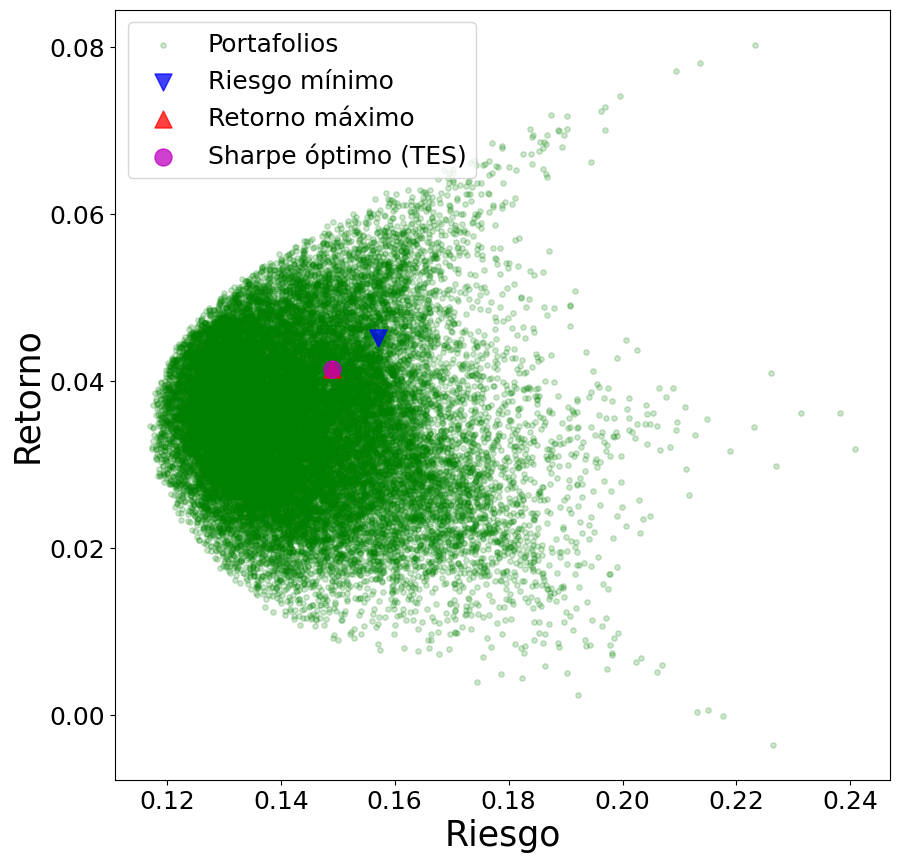

In [85]:
# === Gráfica de la frontera eficiente limpia ===

plt.subplots(figsize=[10,10])

# Nube de portafolios
plt.scatter(portfolios_clean['Riesgo'], portfolios_clean['Retorno'],
            c='g', marker='o', s=15, alpha=0.2, label='Portafolios')

# Portafolio de riesgo mínimo
plt.scatter(min_vol_clean['Riesgo'], min_vol_clean['Retorno'],
            c='b', marker='v', s=150, alpha=0.75, label='Riesgo mínimo')

# Portafolio de máximo retorno
plt.scatter(max_ret_clean['Riesgo'], max_ret_clean['Retorno'],
            c='r', marker='^', s=150, alpha=0.75, label='Retorno máximo')

# Portafolio Sharpe óptimo (TES Colombia)
plt.scatter(opt_ris_clean['Riesgo'], opt_ris_clean['Retorno'],
            c='m', marker='o', s=150, alpha=0.75, label='Sharpe óptimo (TES)')

# Etiquetas y estilo
plt.xlabel('Riesgo', fontsize=25)
plt.ylabel('Retorno', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=18)

plt.show()


### Tampoco sirvió

In [86]:
%pip install cvxpy



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


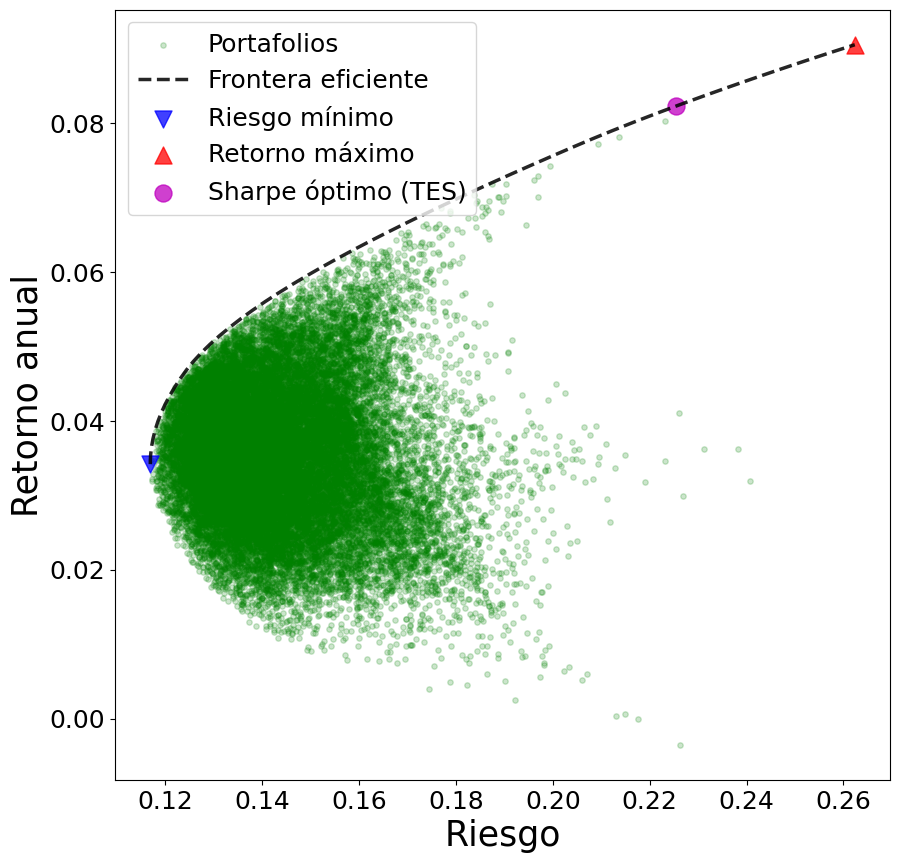

In [88]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

# Preparar datos limpios ya existentes
# Usamos:
# mu_anual_clean   -> vector de retornos anuales limpios
# cov_anual_clean  -> matriz de covarianza anual limpia
# portfolios_clean -> portafolios aleatorios para referencia visual
# retorno_clean    -> retornos diarios limpios

mu = mu_anual_clean.values
Sigma = cov_anual_clean.values
n = len(mu)

rf_col = 0.05  

# PORTAFOLIO DE MÍNIMA VARIANZA (EXACTO)
w = cp.Variable(n)
objective = cp.Minimize(cp.quad_form(w, Sigma))
constraints = [cp.sum(w) == 1, w >= 0]
prob = cp.Problem(objective, constraints)
prob.solve()

w_minvar = w.value
ret_minvar = mu @ w_minvar
risk_minvar = np.sqrt(w_minvar.T @ Sigma @ w_minvar)

# PORTAFOLIO DE MÁXIMO RETORNO (EXACTO)
w = cp.Variable(n)
objective = cp.Maximize(mu @ w)
constraints = [cp.sum(w) == 1, w >= 0]
prob = cp.Problem(objective, constraints)
prob.solve()

w_maxret = w.value
ret_maxret = mu @ w_maxret
risk_maxret = np.sqrt(w_maxret.T @ Sigma @ w_maxret)

# PORTAFOLIO DE MÁXIMO SHARPE (EXACTO)
ones = np.ones(n)

# Dirección del portafolio tangente
w_raw = np.linalg.inv(Sigma) @ (mu - rf_col * ones)

# Long-only
w_raw[w_raw < 0] = 0

# Normalizar
w_sharpe = w_raw / np.sum(w_raw)

# Retorno y riesgo
ret_sharpe = mu @ w_sharpe
risk_sharpe = np.sqrt(w_sharpe.T @ Sigma @ w_sharpe)

# FRONTERA EFICIENTE EXACTA COMPLETA
target_returns = np.linspace(ret_minvar, ret_maxret, 50)

frontier_risk = []
frontier_ret = []

for R in target_returns:
    w = cp.Variable(n)
    constraints = [
        cp.sum(w) == 1,
        w >= 0,
        mu @ w >= R
    ]
    prob = cp.Problem(cp.Minimize(cp.quad_form(w, Sigma)), constraints)
    prob.solve()

    w_opt = w.value
    if w_opt is not None:
        frontier_risk.append(np.sqrt(w_opt.T @ Sigma @ w_opt))
        frontier_ret.append(mu @ w_opt)

# Gráfica 
plt.subplots(figsize=[10,10])

# Nube aleatoria (mismo estilo que antes)
plt.scatter(portfolios_clean['Riesgo'], portfolios_clean['Retorno'],
            c='g', marker='o', s=15, alpha=0.2, label='Portafolios')

# Frontera eficiente
plt.plot(frontier_risk, frontier_ret,
         color='black', linewidth=2.5, alpha=0.85,
         linestyle='--',
         label='Frontera eficiente')

# Punto de riesgo mínimo
plt.scatter(risk_minvar, ret_minvar,
            c='b', marker='v', s=150, alpha=0.75, label='Riesgo mínimo')

# Punto de máximo retorno
plt.scatter(risk_maxret, ret_maxret,
            c='r', marker='^', s=150, alpha=0.75, label='Retorno máximo')

# Punto Sharpe óptimo (TES)
plt.scatter(risk_sharpe, ret_sharpe,
            c='m', marker='o', s=150, alpha=0.75, label='Sharpe óptimo (TES)')

plt.xlabel('Riesgo', fontsize=25)
plt.ylabel('Retorno anual', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.grid(False)  
plt.show()